In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [12]:
feature_id = 7
db_name = '/Users/darylwilding-mcbride/Downloads/HeLa_20KInt-features-{}-{}.sqlite'.format(feature_id, feature_id)

In [13]:
# get the feature's base peak id
db_conn = sqlite3.connect(db_name)
feature_list_df = pd.read_sql_query("select * from feature_list where feature_id={}".format(feature_id), db_conn)
db_conn.close()
if len(feature_list_df) > 0:
    base_peak_id = feature_list_df.iloc[0].base_peak_id.astype(int)
else:
    print("Empty feature list.")

In [14]:
base_peak_id

1

In [15]:
# get all the feature matches with isolation windows
db_conn = sqlite3.connect(db_name)
feature_isolation_matches_df = pd.read_sql_query("select distinct(precursor_id) from feature_isolation_matches where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [16]:
feature_isolation_matches_df

,precursor_id
0,142046
1,142101
2,142150
3,142214
4,142346
5,142745


In [43]:
precursor_id = 142046

In [44]:
db_conn = sqlite3.connect(db_name)
ms2_peaks_df = pd.read_sql_query("select * from ms2_peaks where feature_id={} and precursor={}".format(feature_id,precursor_id), db_conn)
db_conn.close()

In [45]:
ms2_peaks_df.head()

,feature_id,peak_id,centroid_mz,centroid_scan,intensity,cofi_scan,cofi_rt,precursor
0,7,1,1002.508169,339,2940,339.0,4231.114676,142046
1,7,2,298.177085,335,805,335.0,4231.114676,142046
2,7,3,489.263786,340,682,340.0,4231.114676,142046
3,7,4,1003.511353,340,2017,340.0,4231.114676,142046
4,7,5,344.183663,338,665,338.0,4231.114676,142046


In [46]:
len(ms2_peaks_df)

51

In [47]:
peak_ids = ms2_peaks_df.peak_id.values

In [48]:
db_conn = sqlite3.connect(db_name)
summed_ms2_regions_df = pd.read_sql_query("select * from summed_ms2_regions where feature_id={}".format(feature_id), db_conn)
db_conn.close()

In [49]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Rescale to values between 0 and 1 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.)

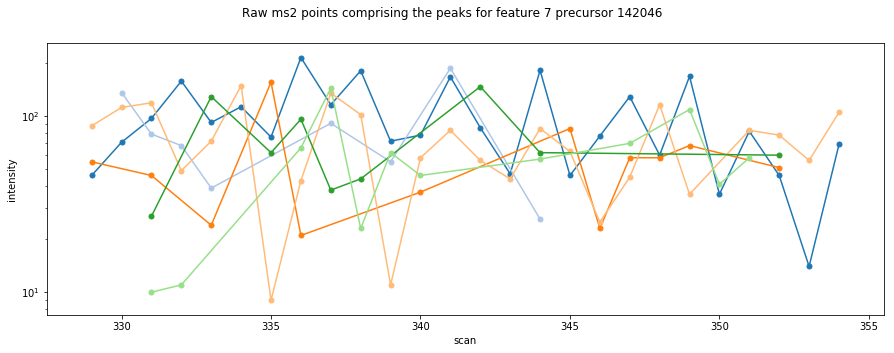

In [50]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms2_regions_df.loc[summed_ms2_regions_df.peak_id==peak_id]
    ax.plot(peak_points_df.scan, peak_points_df.intensity, marker='o', color=tableau20[idx%len(tableau20)], linestyle='-', ms=5, label="peak {}".format(peak_id))
    if idx == 5: break
# plt.legend(loc='best')
plt.xlabel('scan')
plt.ylabel('intensity')
plt.yscale('log')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw ms2 points comprising the peaks for feature {} precursor {}'.format(feature_id, precursor_id))
plt.margins(0.06)
plt.show()

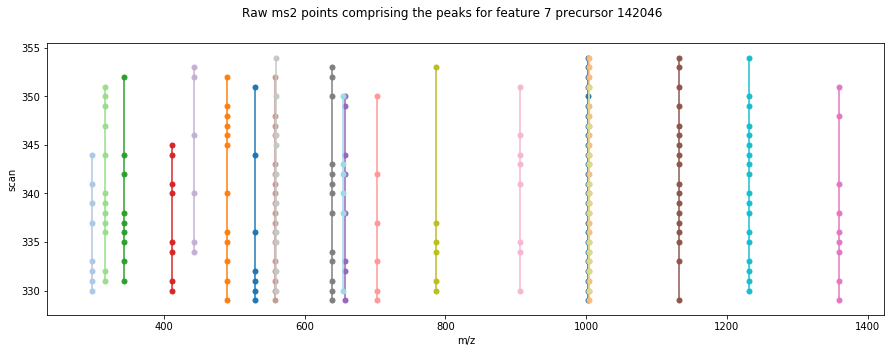

In [53]:
f, ax = plt.subplots()
for idx,peak_id in enumerate(peak_ids):
    peak_points_df = summed_ms2_regions_df.loc[summed_ms2_regions_df.peak_id==peak_id]
    ax.plot(peak_points_df.mz, peak_points_df.scan, marker='o', color=tableau20[idx%len(tableau20)], linestyle='-', ms=5, label="peak {}".format(peak_id))
    if idx == 20: break
# plt.legend(loc='best')
plt.xlabel('m/z')
plt.ylabel('scan')
# plt.yscale('log')
f.set_figheight(5)
f.set_figwidth(15)
plt.suptitle('Raw ms2 points comprising the peaks for feature {} precursor {}'.format(feature_id, precursor_id))
plt.margins(0.06)
plt.show()